<a href="https://colab.research.google.com/github/mrromaniuc/quantum-computing/blob/main/QC_Groover_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
!pip install qiskit
!pip install qiskit-aer
!pip install imgaug==0.2.5
!pip install pylatexenc

References:

In [3]:
#Setting configuration to use matplotlib in drawings
!mkdir ~/.qiskit
!echo "[default]" > ~/.qiskit/settings.conf
!echo "circuit_drawer = mpl" >> ~/.qiskit/settings.conf
!more ~/.qiskit/settings.conf

[default]
circuit_drawer = mpl


In [87]:
import numpy as np
from qiskit.quantum_info.operators import Operator
from qiskit import QuantumCircuit, QuantumRegister

n_qubits = 3
w = np.array([[0], [0], [0], [1], [0], [0], [0], [0]])

mw = np.identity(2**n_qubits) - 2*np.conjugate(w.T)*w
Uf = Operator(mw)

zero = np.array([[1], [0], [0], [0], [0], [0], [0], [0]])
mUf0 = 2*np.conjugate(zero.T)*zero - np.identity(2**n_qubits)
Uf0 = Operator(mUf0)

qr = QuantumRegister(n_qubits, "qb_dif")
dif = QuantumCircuit(qr)

dif.h(qr)
dif.unitary(Uf0, [i for i in range(n_qubits)], label="Uf0")
dif.h(qr)

difuser = dif.to_gate(label="difuser")


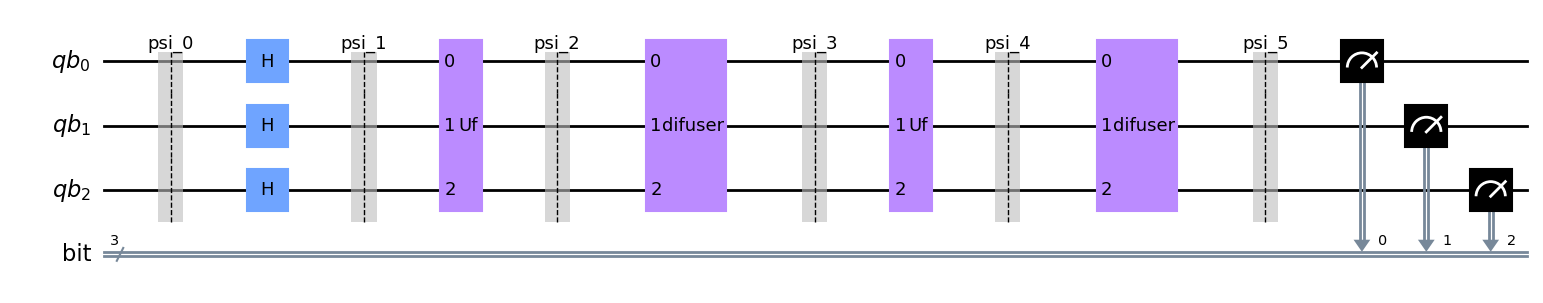

In [92]:
from qiskit import QuantumRegister, QuantumCircuit, ClassicalRegister
from qiskit.quantum_info import Statevector


qr = QuantumRegister(n_qubits, 'qb')
cr = ClassicalRegister(n_qubits, 'bit')
qc = QuantumCircuit()
qc.add_register(qr)
qc.add_register(cr)

psi_0 = Statevector.from_instruction(qc)
qc.barrier(label="psi_0")

qc.h(qr)
psi_1 = Statevector.from_instruction(qc)
qc.barrier(label="psi_1")

qc.unitary(Uf, [i for i in range(n_qubits)], label="Uf")
psi_2 = Statevector.from_instruction(qc)
qc.barrier(label="psi_2")

qc.append(difuser, [i for i in range(n_qubits)])
psi_3 = Statevector.from_instruction(qc)
qc.barrier(label="psi_3")

qc.unitary(Uf, [i for i in range(n_qubits)], label="Uf")
psi_4 = Statevector.from_instruction(qc)
qc.barrier(label="psi_4")

qc.append(difuser, [i for i in range(n_qubits)])
psi_5 = Statevector.from_instruction(qc)
qc.barrier(label="psi_5")

qc.measure(qr, cr)

qc.draw()


/usr/local/lib/python3.10/dist-packages/matplotlib/transforms.py:762: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


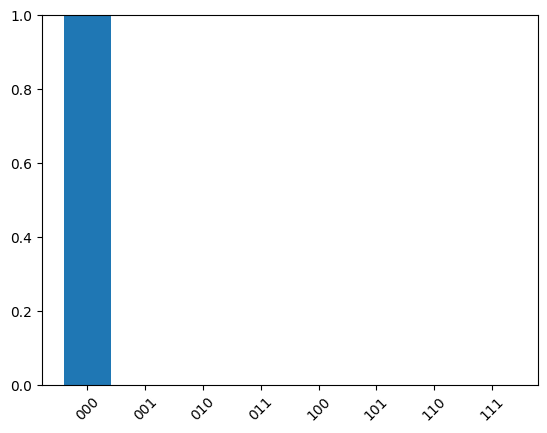

In [93]:
import matplotlib.pyplot as plt

def plot(psi, n_qubits):
  x = [bin(i).replace("0b","").rjust(n_qubits, "0") for i in range(2**n_qubits)]
  #print(x)
  prob = psi.probabilities()
  plt.xticks(rotation = 45)
  plt.bar(x, psi)
  plt.ylim(top=1)

plot(psi_0, n_qubits)

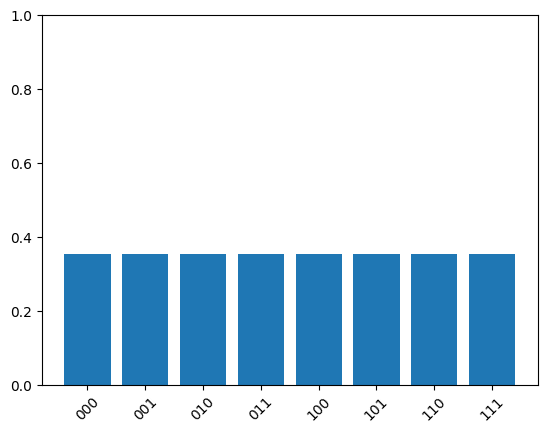

In [94]:
plot(psi_1, n_qubits)

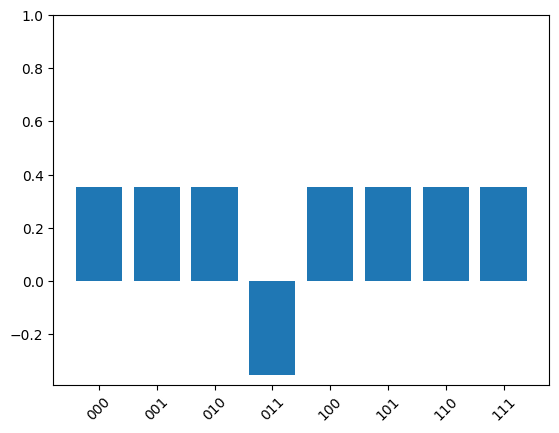

In [95]:
plot(psi_2, n_qubits)

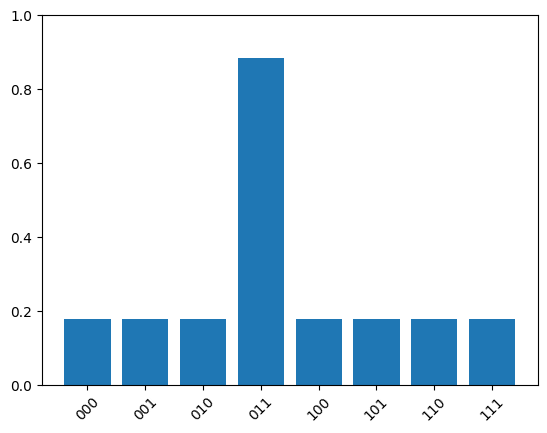

In [96]:
plot(psi_3, n_qubits)

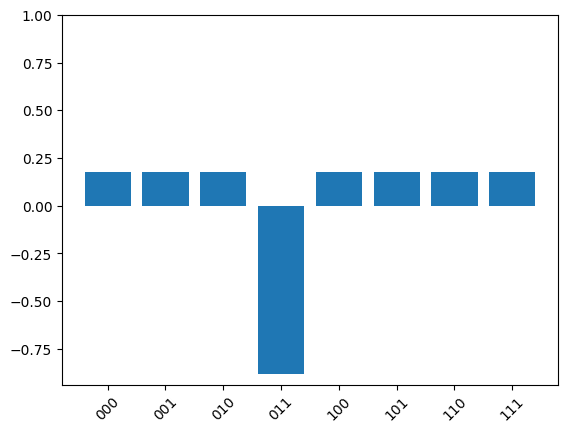

In [97]:
plot(psi_4, n_qubits)

Statevector([-0.08838835+0.j, -0.08838835+0.j, -0.08838835+0.j,
              0.97227182+0.j, -0.08838835+0.j, -0.08838835+0.j,
             -0.08838835+0.j, -0.08838835+0.j],
            dims=(2, 2, 2))


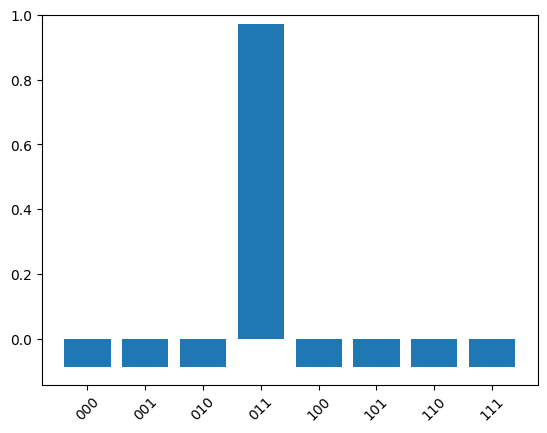

In [98]:
plot(psi_5, n_qubits)
psi_5

In [100]:
from qiskit import IBMQ, Aer, transpile, execute
from qiskit.visualization import plot_histogram

qasm_sim = Aer.get_backend('qasm_simulator')
transpiled_qc = transpile(qc, qasm_sim)
results = qasm_sim.run(transpiled_qc, shots=1000).result()
counts = results.get_counts()
plot_histogram(counts)

MissingOptionalLibraryError: ignored

In [71]:
from math import asin

np.pi/(4*asin(1/4)) - 0.4

2.7082688394304086

In [85]:
np.pi/(4*asin(1/np.sqrt(8))) - 0.5

1.6734079041462842